In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("inflammation_diagnosis.csv", sep=";")

In [3]:
df.head()

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,inflammation,nephritis
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         120 non-null    float64
 1   nausea              120 non-null    object 
 2   lumbar_pain         120 non-null    object 
 3   urine_pushing       120 non-null    object 
 4   micturition_pains   120 non-null    object 
 5   burning_of_urethra  120 non-null    object 
 6   inflammation        120 non-null    object 
 7   nephritis           120 non-null    object 
dtypes: float64(1), object(7)
memory usage: 7.6+ KB


In [5]:
def get_deasease(x):
    """
    calculate deasease value using inflammation, nephritis
    """
    lookup = {'no': False,'yes': True}
    if not lookup[x.inflammation] and not lookup[x.nephritis]:
        return False
    else:
        return True

In [6]:
df['deasease'] = df.apply(get_deasease, axis=1)

In [7]:
df.drop(columns=['inflammation', 'nephritis'], inplace=True)

In [8]:
# train test split
row_count = df.shape[0]
split_point = int(row_count*0.20)
test_data, train_data = df[:split_point], df[split_point:]


In [9]:
print(f"data size {row_count}")
print(f"test_data size {len(test_data)}, train_data size {len(train_data)}")


data size 120
test_data size 24, train_data size 96


In [10]:
from naive_bayes_2classifier import NaiveBayes
target_column = 'deasease'
nb_classifier = NaiveBayes(continuous=[True, False, False, False, False, False])  # Adjust according to your features
nb_classifier.fit(train_data, target_column)
probabilities_df = nb_classifier.predict_probability(test_data)
accuracy, confusion_matrix = nb_classifier.evaluate_on_data(test_data, test_data[target_column])

In [11]:
accuracy,  confusion_matrix

(1.0,
 Actual     False  True 
 Predicted              
 False         11      0
 True           0     13)

In [12]:
df.head()

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,deasease
0,35.5,no,yes,no,no,no,False
1,35.9,no,no,yes,yes,yes,True
2,35.9,no,yes,no,no,no,False
3,36.0,no,no,yes,yes,yes,True
4,36.0,no,yes,no,no,no,False


In [13]:
df.columns

Index(['temperature', 'nausea', 'lumbar_pain', 'urine_pushing',
       'micturition_pains', 'burning_of_urethra', 'deasease'],
      dtype='object')

In [14]:
from naive_bayes_1classifier import NaiveBayes
# Sample data
data = df
# Separate features and target label
y_train = train_data.pop('deasease')
X_train = train_data
# Example test data
y_test = test_data.pop('deasease') # Actual test labels for evaluation
X_test = test_data
# Initialize the NaiveBayes model
continuous_features = [True, False, False, False, False, False]  # temperature is continuous, Feature2 are discrete
model = NaiveBayes(continuous=continuous_features)
# Fit the model on training data
model.fit(df, target_name='deasease')

In [15]:
# Predict probabilities for test data
predicted_probabilities = model.predict_probability(X_test)
print("Predicted Probabilities:\n", predicted_probabilities)

Predicted Probabilities:
         False      True  Prediction
0   -4.305832 -8.724922       False
1  -46.182247 -5.581621        True
2   -4.042568 -8.304612       False
3  -46.123175 -5.484704        True
4   -3.983496 -8.207696       False
5   -3.983496 -8.207696       False
6  -46.013122 -5.300664        True
7   -3.873443 -8.023656       False
8  -45.962142 -5.213541        True
9  -45.825385 -4.971758        True
10 -45.825385 -4.971758        True
11  -3.685706 -7.694749       False
12  -3.685706 -7.694749       False
13 -45.785194 -4.897692        True
14  -3.645515 -7.620684       False
15  -3.645515 -7.620684       False
16 -45.747700 -4.826891        True
17 -45.747700 -4.826891        True
18 -45.712904 -4.759354        True
19  -3.573225 -7.482345       False
20 -31.865295 -4.918225        True
21 -31.865295 -4.918225        True
22  -3.541127 -7.418073       False
23 -45.680805 -4.695081        True


In [16]:
# Predict the class labels for test data
predicted_labels = predicted_probabilities['Prediction']
print("Predicted Labels:", predicted_labels.values)

Predicted Labels: [False  True False  True False False  True False  True  True  True False
 False  True False False  True  True  True False  True  True False  True]


In [17]:
# Evaluate the model
accuracy, confusion_matrix = model.evaluate_on_data(X_test, y_test)
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion_matrix}")

Accuracy: 1.0
Confusion Matrix:
Predicted  False  True 
Actual                 
False         11      0
True           0     13


In [18]:

# Plot Confusion Matrix
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.show()

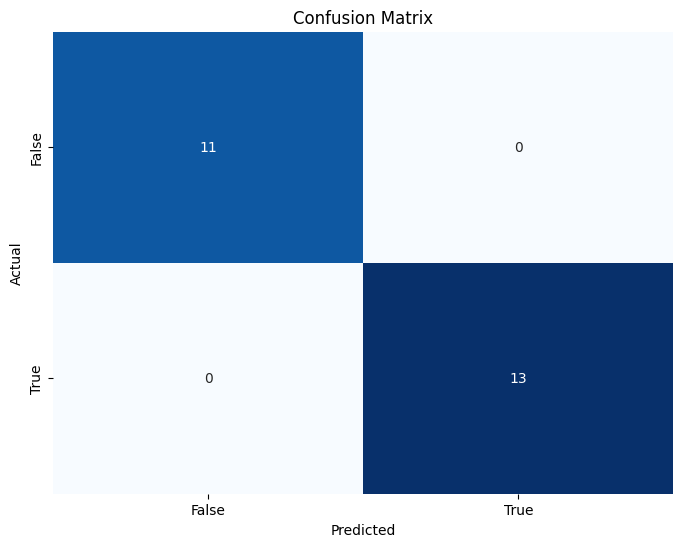

In [19]:
plot_confusion_matrix(confusion_matrix)